In [1]:
#Importar las librerías por utilizar
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import skimage
from skimage import io
from skimage.filters import threshold_otsu,sobel,sobel_v,sobel_h

#Obtener la direccion de las imagenes
path = os.getcwd()

Deteccion de cromatico o no cromatico

[255 255 255 255]


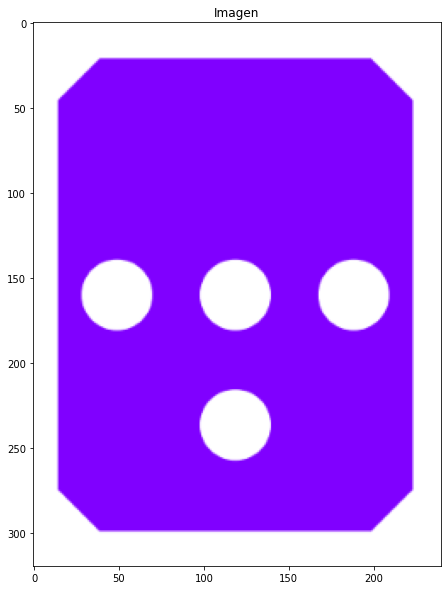

In [15]:
imagen= io.imread(path +r'\Morada3.png')

plt.figure(figsize=(15,10))
plt.imshow(imagen)
plt.title("Imagen")
print(imagen[1][1])
plt.show()

[255 255 255]


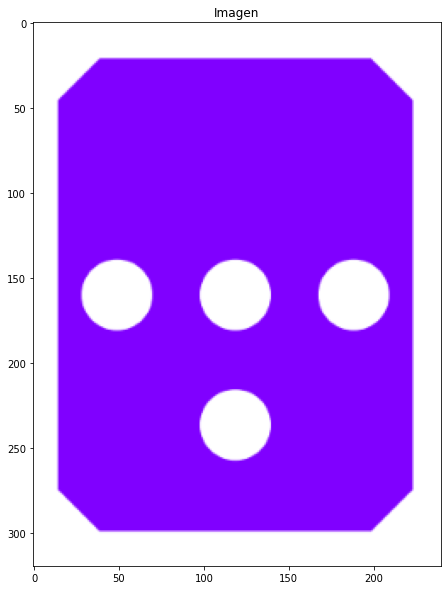

In [16]:
def rgba2rgb( rgba, background=(255,255,255) ):
    row, col, ch = rgba.shape
    if ch == 3:
        return rgba
    assert ch == 4, 'RGBA image has 4 channels.'
    rgb = np.zeros( (row, col, 3), dtype='float32' )
    r, g, b, a = rgba[:,:,0], rgba[:,:,1], rgba[:,:,2], rgba[:,:,3]
    a = np.asarray( a, dtype='float32' ) / 255.0
    R, G, B = background
    rgb[:,:,0] = r * a + (1.0 - a) * R
    rgb[:,:,1] = g * a + (1.0 - a) * G
    rgb[:,:,2] = b * a + (1.0 - a) * B
    return np.asarray( rgb, dtype='uint8' )

imagen_argb= io.imread(path +r'\Morada3.png')
imagen_rgb= rgba2rgb(imagen_argb)
plt.figure(figsize=(15,10))
plt.imshow(imagen_rgb)
plt.title("Imagen")
print(imagen_rgb[1][1])
plt.show()

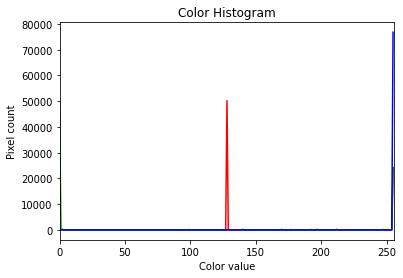

In [17]:
colors = ("red", "green", "blue")
channel_ids = (0, 1, 2)

# create the histogram plot, with three lines, one for
# each color
plt.figure()
plt.xlim([0, 256])
for channel_id, c in zip(channel_ids, colors):
    histogram, bin_edges = np.histogram(
        imagen_rgb[:, :, channel_id], bins=256, range=(0, 256)
    )
    plt.plot(bin_edges[0:-1], histogram, color=c)

plt.title("Color Histogram")
plt.xlabel("Color value")
plt.ylabel("Pixel count")

plt.show()

In [42]:
def is_cromatic(image):
    rows=len(image)
    print(rows)
    columns=len(image[1])
    print(columns)
    pxl_sum = rows*columns
    print(pxl_sum)
    not_greyscale = 0
    for row in range(rows):
        for column in range(columns):
            r = image[row][column][0]
            g = image[row][column][1]
            b = image[row][column][2]
            if r != g !=b:
                not_greyscale+= 1
    print(f'Pixeles cromaticos: {not_greyscale}')
    print(0.6*pxl_sum)
    if not_greyscale >= 0.6*pxl_sum:
        return True
    else:
        return False

In [43]:
is_cromatic(imagen_rgb)

320
240
76800
Pixeles cromaticos: 52603
46080.0


True

La segunda funcion calcula cuantos pixeles cromaticos, blancos y totales hay en la imagen, luego calcula la cantidad de pixles no blancos, es decir pertenecen al objeto o a la sombra, y compara un porcentaje de estos que equivalga a los pixeles que si son del objeto y los compara con la cantidad de pixeles no cromaticos, en donde si hay mas pixeles cromaticos entonces el objeto es cromatico. Asumiendo que un 90% de lo pixeles no blancos pertenecen al objeto.

In [53]:
def is_cromatic_v2(image):
    rows=len(image)
    print(rows)
    columns=len(image[1])
    print(columns)
    pxl_sum = rows*columns
    print(pxl_sum)
    not_greyscale = 0
    white = 0
    for row in range(rows):
        for column in range(columns):
            r = image[row][column][0]
            g = image[row][column][1]
            b = image[row][column][2]
            if r != g !=b:
                not_greyscale+= 1
            elif r == g == b == 255:
                white+= 1
    obj_pxl = pxl_sum - white
    print(f'Pixeles cromaticos: {not_greyscale}')
    print(f'Pixeles del objeto: {obj_pxl}')
    if not_greyscale >= 0.9*obj_pxl:
        return True
    else:
        return False

In [54]:
grey_argb= io.imread(path +r'\Gris3.png')
grey_rgb= rgba2rgb(grey_argb)
is_cromatic(grey_rgb)

320
240
76800
Pixeles cromaticos: 0
46080.0


False

In [51]:
is_cromatic_v2(imagen_rgb)

320
240
76800
Pixeles cromaticos: 52603
Pixeles del objeto: 52624


True

Hay un problema, las fotos capturadas con el celular no capturan el blanco como blanco, sino como amarillo por lo que los detecta como si fuera de color

In [68]:
def is_cromatic_v3(image):
    rows=len(image)
    columns=len(image[1])
    for row in range(rows):
        for column in range(columns):
            r = image[row][column][0]
            g = image[row][column][1]
            b = image[row][column][2]
            if r != g !=b:
                return True

In [69]:
fotosinobj_argb= io.imread(path +r'\IMG_AZUL_SINOBJ.jpeg')
fotosinobj_rgb= rgba2rgb(fotosinobj_argb)
is_cromatic_v3(fotosinobj_rgb)

True

In [76]:
def is_white(image):
    rows=len(image)
    columns=len(image[1])
    whites = 0
    for row in range(rows):
        for column in range(columns):
            r = image[row][column][0]
            g = image[row][column][1]
            b = image[row][column][2]
            if r == g == b == 255:
                whites+= 1
    return whites

Se confirma con la funcion que cuenta blancos, en efecto no hay pixeles blancos en la imagen, se requiere segmentacion

In [78]:
is_white(fotosinobj_rgb)

0

In [ ]:
def is_cromatic_v4(image):
    rows=len(image)
    columns=len(image[1])
    for row in range(rows):
        for column in range(columns):
            r = image[row][column][0]
            g = image[row][column][1]
            b = image[row][column][2]
            desvest = np.std([r,g,b])
            if desvest:
                return True

Deteccion de agujeros

0